## 实战案例: Elo Merchant Category Recommendation

### 1. EDA (数据探索性分析)

#### 1.1 数据导入，重命名

In [160]:
# 导入数据集
import pandas as pd

train = pd.read_csv(r"../data/elo-merchant-category-recommendation/train.csv")
test = pd.read_csv(r"../data/elo-merchant-category-recommendation/test.csv")

In [161]:
# 中英文对照
name_map={
    "card_id": "信用卡ID",
    "first_active_month": "首次使用信用卡月份",
    "feature_1": "信用卡离散特征1",
    "feature_2": "信用卡离散特征2",
    "feature_3": "信用卡离散特征3",
    "target": "用户对信用卡忠诚度分数",
    "month_lag": "距离参考日期月份",
    "purchase_date": "购物时间",
    "installments": "购买商品数量",
    "category_1": "匿名类别特征1",
    "category_2": "匿名类别特征2",
    "category_3": "匿名类别特征3",
    "category_4": "匿名类别特征4",
    "merchant_category_id": "商品类别id",
    "subsector_id": "商品种类群id",
    "merchant_id": "商户id",
    "purchase_amount": "标准化的购物金额",
    "city_id": "城市id",
    "state_id": "州id",
    "merchant_group_id": "商品组id",
    "numerical_1": "匿名数值特征1",
    "numerical_2": "匿名数值特征2",
    "most_recent_sales_range": "最近活跃月份的销售额等级",
    "most_recent_purchases_range": "最近活跃月份的交易数量等级",
    "avg_sales_lag3": "过去3个月的月平均收入除以上一个活跃月份的收入",
    "avg_sales_lag6": "过去6个月的月平均收入除以上一个活跃月份的收入",
    "avg_sales_lag12": "过去12个月的月平均收入除以上一个活跃月份的收入",
    "avg_purchases_lag3": "过去3个月的月平均交易量除以上一个活跃月份的交易量",
    "avg_purchases_lag6": "过去6个月的月平均交易量除以上一个活跃月份的交易量",
    "avg_purchases_lag12": "过去12个月的月平均交易量除以上一个活跃月份的交易量",
    "active_months_lag3": "过去3个月内的活跃月份数量",
    "active_months_lag6": "过去6个月内的活跃月份数量",
    "active_months_lag12": "过去12个月内的活跃月份数量",
}

In [162]:
train_zh=train.rename(columns=name_map)
test_zh=test.rename(columns=name_map)

#### 1.2 特征分布校验

ValueError: x and y must have same first dimension, but have shapes (201917,) and (123623,)

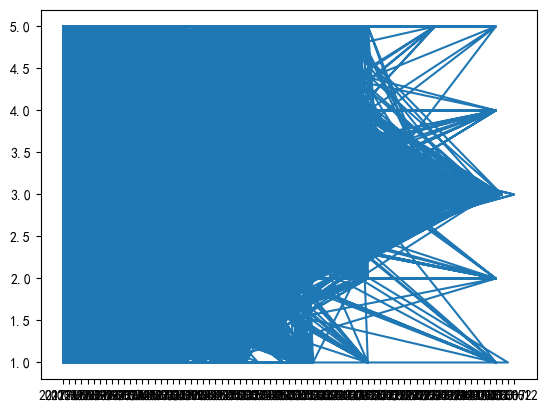

In [163]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

train_=train_zh.loc[:, ~train_zh.columns.isin(["信用卡ID", "用户对信用卡忠诚度分数"])]
test_=test_zh.loc[:, ~test_zh.columns.isin(["信用卡ID", "用户对信用卡忠诚度分数"])]


rcParams['font.family'] = 'SimHei'
# 假设 train 和 test 是你的 DataFrame，并且你要绘制的列名为 '某列名'
# 替换 '某列名' 为你想要绘制的具体列名
plt.plot(train_["首次使用信用卡月份"],train_['信用卡离散特征1'], label='Train')
plt.plot(train_["首次使用信用卡月份"],test_['信用卡离散特征1'],  label='Test')

# 添加标题和标签
plt.title('Train 和 Test 直方图')
plt.xlabel('值')
plt.ylabel('频率')
plt.legend()  # 显示图例

# 显示图形
plt.show()